In [232]:
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import numpy as np
import numpy as np

import requests 
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
def strip_spaces(a_str_with_spaces):
    return a_str_with_spaces.replace(" ", "")


def remove_string(string):
    string = string.replace(" ","")
    for i in range(0, len(string)):
        if(string[i] == "("):
            string = string[:i]
            return strip_spaces(string)

In [234]:
URL = 'https://www.thelancet.com/journals/laneur/article/PIIS1474-4422(19)30034-1/fulltext'
page = requests.get(URL)

In [235]:
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df.columns = range(df.shape[1])
df = df.iloc[:,0:2]



In [236]:
df

,0,1
0,Global,5 528 232 (5 334 609 to 5 734 681)
1,High SDI,721 049 (674 368 to 770 105)
2,High-middle SDI,1 082 392 (989 070 to 1 191 869)
3,Middle SDI,2 229 002 (2 156 876 to 2 302 482)
4,Low-middle SDI,1 181 709 (1 124 199 to 1 234 945)
5,Low SDI,311 001 (290 881 to 331 322)
6,High-income North America,195 661 (185 354 to 206 778)
7,Canada,18 433 (16 889 to 20 236)
8,Greenland,33 (26 to 42)
9,USA,177 196 (167 723 to 187 486)


In [237]:
a = list() 
b = list()
for i in range(0,221):
    for j in range(1,2):
            a.append(df.at[i,j])
            
for i in range(0,221):
    for j in range(0,1):
            b.append(df.at[i,j])           
            
            
for i in range(0,221):
    s = str()
    s = a[i]
    str_en = s.encode("ascii", "ignore")
    str_de = str_en.decode()
    a[i] = str_de
    a[i] = remove_string(a[i])
    
    
d = {'stroke_number': a, 'country_name':b}
df = pd.DataFrame(data=d)



df

,stroke_number,country_name
0,5528232,Global
1,721049,High SDI
2,1082392,High-middle SDI
3,2229002,Middle SDI
4,1181709,Low-middle SDI
5,311001,Low SDI
6,195661,High-income North America
7,18433,Canada
8,33,Greenland
9,177196,USA


In [238]:
df.dropna(how='all')
# df.describe()

,stroke_number,country_name
0,5528232,Global
1,721049,High SDI
2,1082392,High-middle SDI
3,2229002,Middle SDI
4,1181709,Low-middle SDI
5,311001,Low SDI
6,195661,High-income North America
7,18433,Canada
8,33,Greenland
9,177196,USA


In [239]:
df.describe()

 

,stroke_number,country_name
count,218,221
unique,218,221
top,195661,Marshall Islands
freq,1,1


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stroke_number  218 non-null    object
 1   country_name   221 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [241]:
df = df.drop(labels=[50,107,108], axis=0)

In [242]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 220
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stroke_number  218 non-null    object
 1   country_name   218 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


In [243]:
lst = []
for i in df['stroke_number']:
    lst.append(int(i))

df['number_'] = lst

df

,stroke_number,country_name,number_
0,5528232,Global,5528232
1,721049,High SDI,721049
2,1082392,High-middle SDI,1082392
3,2229002,Middle SDI,2229002
4,1181709,Low-middle SDI,1181709
5,311001,Low SDI,311001
6,195661,High-income North America,195661
7,18433,Canada,18433
8,33,Greenland,33
9,177196,USA,177196


In [265]:
df = df.sort_values(["number_", "country_name"], ascending=False)

df = df.reset_index(drop = True)

In [266]:
df

,country_name,number_
0,Global,5528232
1,Middle SDI,2229002
2,East Asia,1848933
3,China,1790033
4,Low-middle SDI,1181709
5,High-middle SDI,1082392
6,South Asia,954892
7,High SDI,721049
8,India,694144
9,Southeast Asia,504522


In [246]:
del df['stroke_number']

In [247]:
# df = df.drop(df.index[5:217])

In [267]:
df

,country_name,number_
0,Global,5528232
1,Middle SDI,2229002
2,East Asia,1848933
3,China,1790033
4,Low-middle SDI,1181709
5,High-middle SDI,1082392
6,South Asia,954892
7,High SDI,721049
8,India,694144
9,Southeast Asia,504522


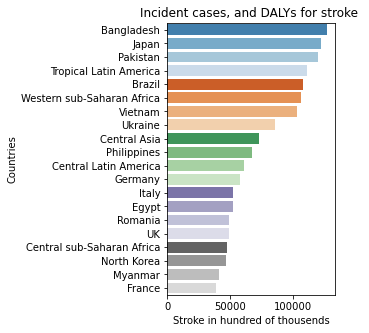

In [288]:
plt.figure(figsize=(3,5))
ax = sns.barplot(x=df['number_'][21:41], y=df['country_name'][21:41],
                 data=current_population, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(current_population["number_"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Incident cases, and DALYs for stroke ")
ax.set_xlabel(xlabel = 'Stroke in hundred of thousends', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()